In [2]:
%load_ext autoreload
%autoreload 2

from ga.fitness import numba_mean_log_prob_fitness
from data.digits import load_dataset
from ga.selection import  rank_selection_factory
from ga.mutation import numba_constant_uniform_mutation2, delete_random_emission_symbols
from ga.crossover import uniform_crossover
from ga.numba_ga import GaHMM
from hmm.bw_numba import multiple_observation_sequences_from_ndarray_list
from hmm.bw_numba import calc_mean_log_prob
import numpy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
training_data = load_dataset(dataset='train')
digit = 0
n_samples = 12
samples = training_data[digit][:n_samples]

# def observation_sequences(n_symbols):
#     sequences = []
#     n_sequences = 10
#     min_seq_length = 15
#     max_seq_length = 500

#     for i in range(n_sequences):
#         seq_length = numpy.random.randint(low=min_seq_length, high=max_seq_length)
#         rand_sequence = numpy.random.randint(low=0, high=n_symbols, size=seq_length)
#         sequences.append(rand_sequence)

#     res = multiple_observation_sequences_from_ndarray_list(sequences)
#     return res


observations = multiple_observation_sequences_from_ndarray_list(samples)

gabw = GaHMM(
        n_symbols=128,
        n_states=4,
        population_size=13,
        n_generations=1000
    )

# observations = observation_sequences(128)
gabw.fitness_func = numba_mean_log_prob_fitness(observations)
gabw.mutation_func = numba_constant_uniform_mutation2(mutation_threshold=0.001)
# gabw.mutation_func = delete_random_emission_symbols(n_zeros=1)
gabw.crossover_func = uniform_crossover
gabw.parent_select_func = rank_selection_factory(gabw.population_size)


def numba_cache()
# gabw.start()
# gabw.plot()

In [4]:
gabw.start()
# gabw.plot()
print('shish')

shish


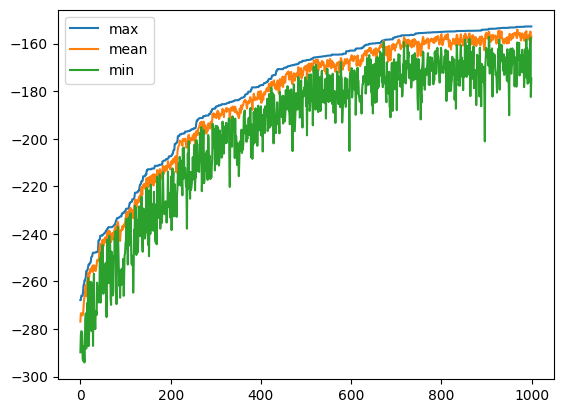

In [5]:
gabw.plot()

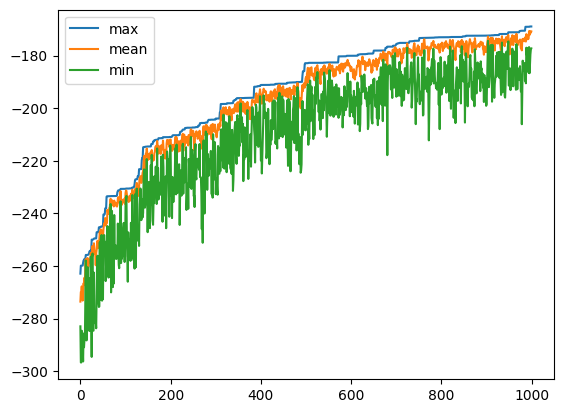

In [30]:
gabw.plot()

In [23]:
gabw.population[3]

array([ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.59209074e-03,  5.82617790e-05,  1.18845567e-03,  2.04310040e-03,
        2.87537771e-04,  1.57173495e-02,  1.75576669e-03,  8.26564602e-04,
        3.70521582e-04,  2.50834017e-04,  3.36670167e-04,  1.00845050e-03,
        1.40444760e-03,  2.20295083e-03,  1.31255840e-03,  1.51226035e-03,
        1.60653464e-03,  1.50807899e-03,  1.32392779e-03,  2.18800376e-03,
        4.34415836e-04,  2.26756084e-03,  1.43812922e-03,  7.79559841e-05,
        1.05896217e-03,  2.25737040e-03,  1.04323678e-01,  7.30609983e-04,
        1.83074059e-03,  1.98778345e-03,  4.13294359e-04,  5.03081860e-08,
        1.58327198e-03,  1.45018507e-08,  4.04782383e-05,  6.67875576e-08,
        2.19380674e-03,  1.68877112e-04,  4.73667059e-06,  1.76923366e-05,
        2.95885471e-09,  1.11037546e-04,  3.59500078e-05,  2.83022508e-04,
        7.88827736e-08,  3.39141321e-09,  3.69444449e-08,  5.22422085e-08,
        6.34933248e-08,  